In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print('\nColumns with missing value:') 
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


In [5]:
netflix_df.isnull().sum().sum()

4307

In [6]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)

In [7]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration         True
listed_in       False
description     False
dtype: bool

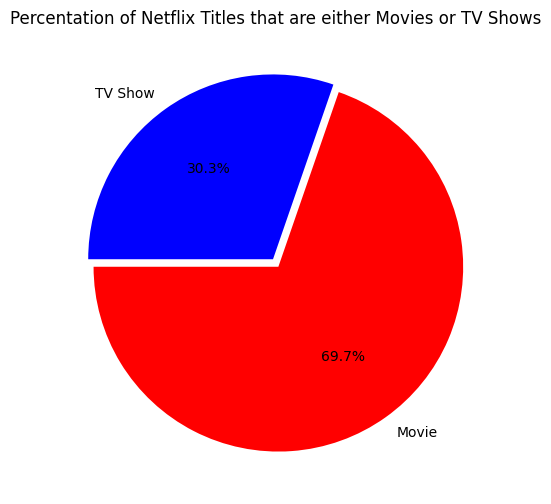

In [12]:
plt.figure(figsize=(12,6))
plt.title('Percentation of Netflix Titles that are either Movies or TV Shows')
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['red', 'blue'],autopct='%1.1f%%', startangle=180)
plt.show()

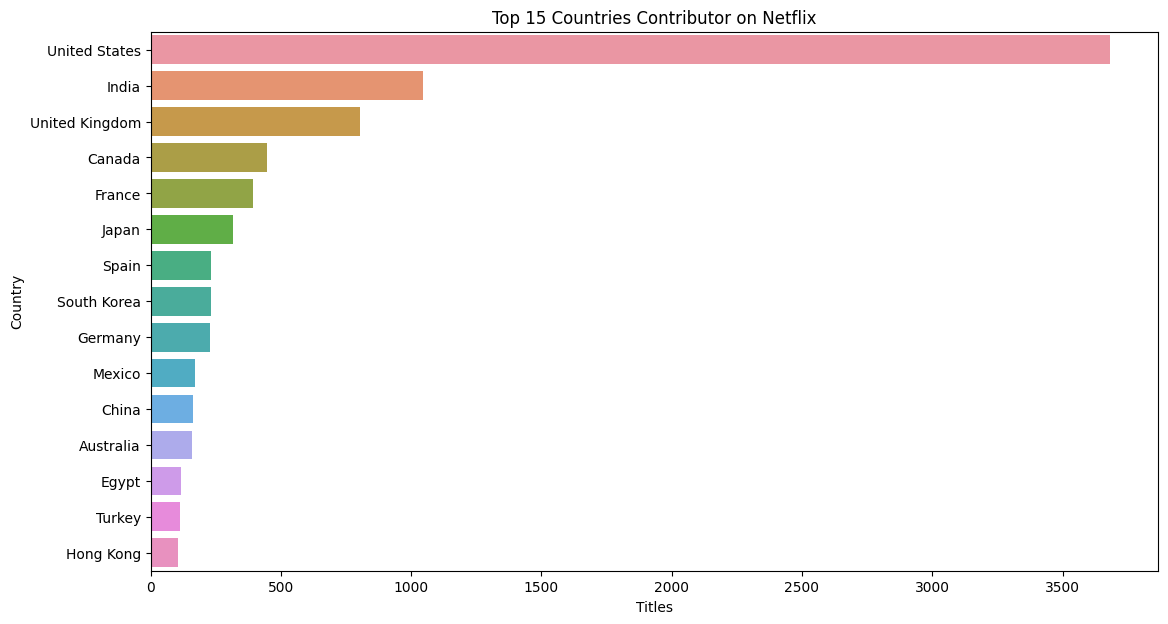

In [18]:
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

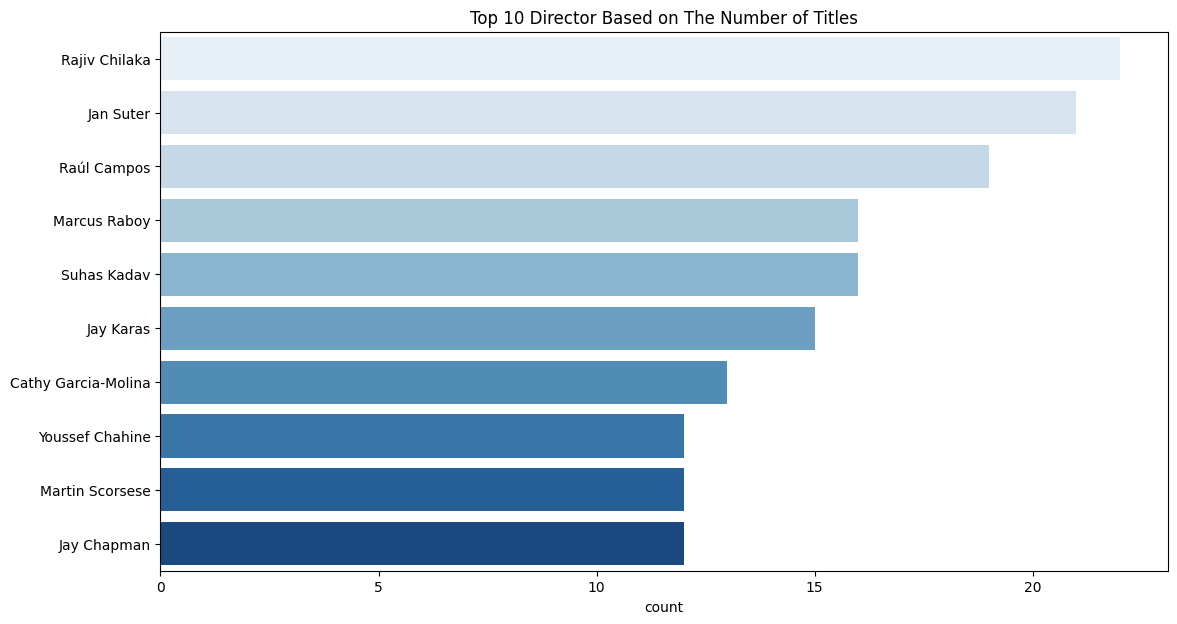

In [22]:
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

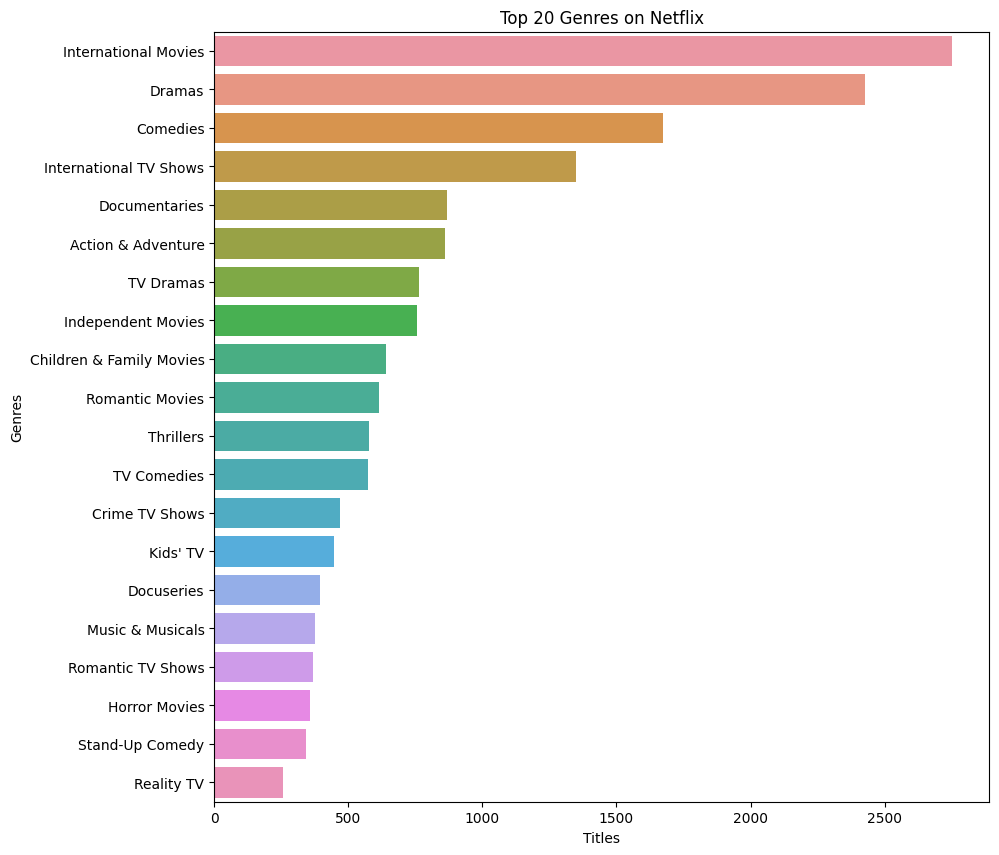

In [23]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

C:\Users\Gaikwad\AppData\Local\Temp\ipykernel_4836\3756145470.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)


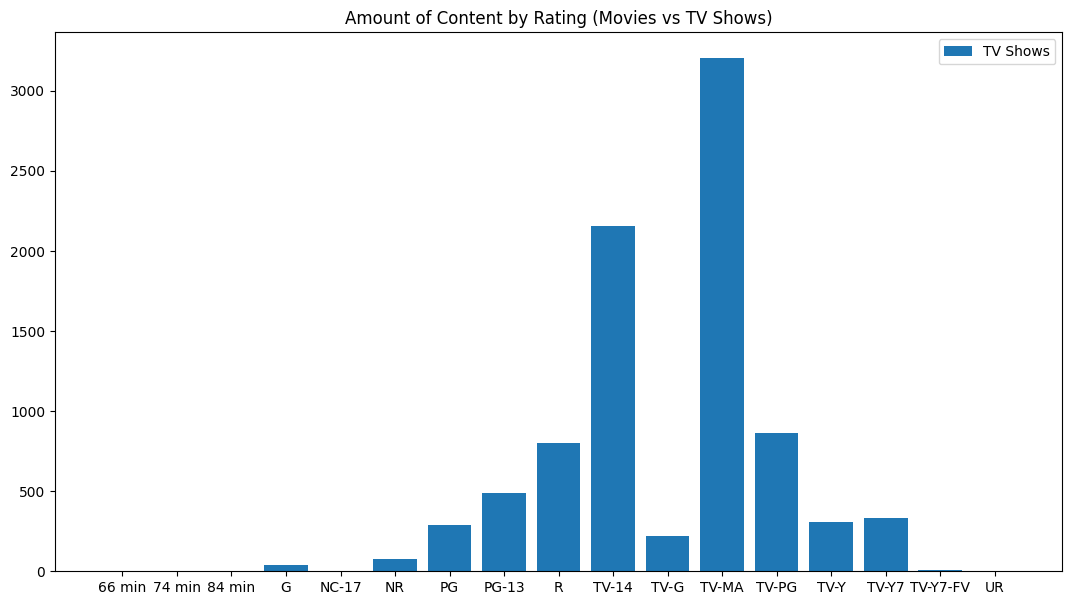

In [27]:
order = netflix_df.rating.unique()
count_movies = netflix_df.groupby('rating')['title'].count().reset_index()
count_shows = netflix_df.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append([{"rating" : "NC-17", "title" : 0},{"rating" : "PG-13", "title" : 0},{"rating" : "UR", "title" : 0}], ignore_index=True)
count_shows.sort_values(by="rating", ascending=True)
plt.figure(figsize=(13,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(count_movies.rating, count_movies.title)
plt.legend(['TV Shows', 'Movies'])
plt.show()


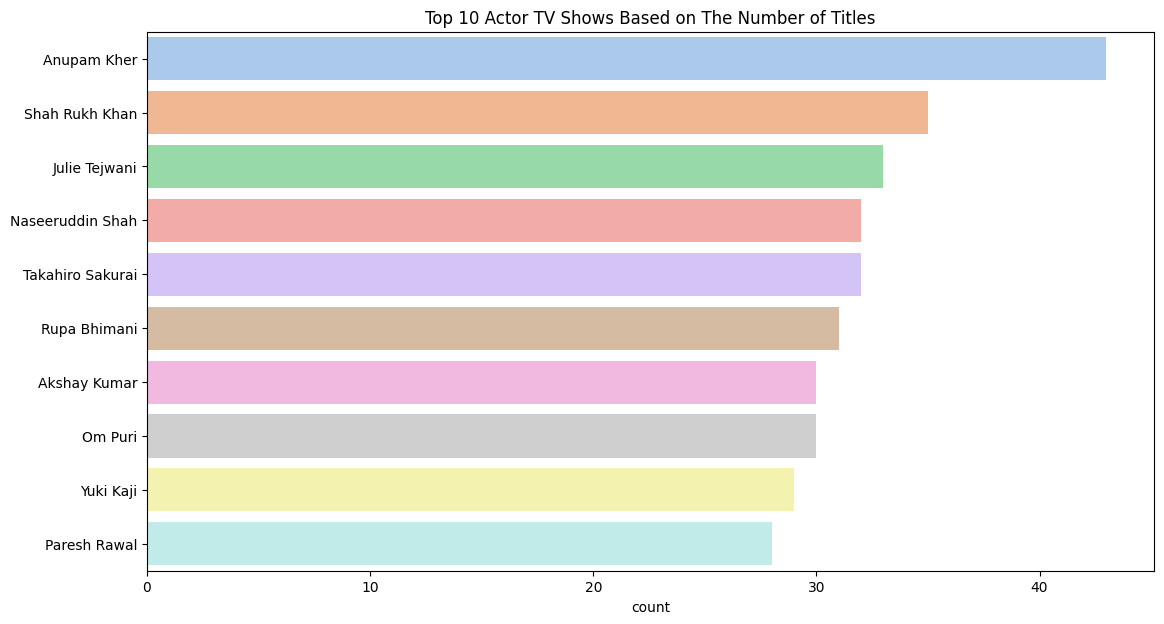

In [31]:
filtered_cast_shows = netflix_df[netflix_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()